## Derive daily water potential for each of the five sites across a Southern California Climate Gradient

By Bin Wang (@bioatmo_sphere) | wbwenwu@gmail.com

---

**Methods**: an approximate method--scaling of $\psi$ with **daily** (instead of total) precipitation and mean annual temperature--was applied

**Data Source**:

- Desert: Boyd Deep Canyon California [data acess page](https://wrcc.dri.edu/cgi-bin/rawMAIN.pl?caucde);[Station Site](https://deepcanyon.ucnrs.org/weather-data/)
- Scrubland:https://wrcc.dri.edu/cgi-bin/rawMAIN.pl?caucbu (Burns Pinon Ridge Reserve California);  ~~https://deepcanyon.ucnrs.org/weather-data/~~(`per Glassman et al. 2019 PNAS`);
- Grassland: Allison and Goulden 2017 SBB; flux site data access:https://www.ess.uci.edu/~california/
- Pine-Oak: https://wrcc.dri.edu/cgi-bin/rawMAIN.pl?caucja (Jame Reserve, California)
- Subalpine: https://raws.dri.edu/cgi-bin/rawMAIN.pl?caCMSJ(Mt. San Jacinto California); State Park:https://www.parks.ca.gov/?page_id=636)

**NOTE**: data in Glassman et al. (2019)([link](https://github.com/stevenallison/UCIClimateExperiment/blob/master/Precipitation.R)) are field transplanting-focused, which used data limited to specific years. Instead, this simulation project, in principle, should use climate data of broader ranges, though in practice, with data availability and accessibility limititations, those field experimentation-generated data can be used instead.

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import numpy  as np
import matplotlib
import matplotlib.pyplot as plt

print("Numpy version:", np.__version__)
print("Pandas version:",pd.__version__)
print("Matplotlib version:",matplotlib.__version__)

Numpy version: 1.19.2
Pandas version: 1.2.2
Matplotlib version: 3.3.4


## `Desert`

In [2]:
desert_precip = pd.read_csv("precipitation/Boyd_Deep_Canyon_Daily_Precipitation.csv")
desert_precip.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/11,2011,1,1,0.00
1,1/2/11,2011,2,2,0.00
2,1/3/11,2011,3,3,0.01
3,1/4/11,2011,4,4,0.00
4,1/5/11,2011,5,5,0.00


In [3]:
desert_precip.tail()

,Date,Year,Day of Year,Day of Run,Total Precipitation
3282,12/27/19,2019,361,3283,0.00
3283,12/28/19,2019,362,3284,0.00
3284,12/29/19,2019,363,3285,0.00
3285,12/30/19,2019,364,3286,0.04
3286,12/31/19,2019,365,3287,0.00


In [4]:
desert_precip.isnull().values.any()

False

In [5]:
desert_precip[desert_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation
2763,7/26/18,2018,207,2764,-9999.0
2764,7/27/18,2018,208,2765,-9999.0


In [6]:
desert_precip_cor = desert_precip.copy()

In [7]:
desert_precip_cor[desert_precip['Total Precipitation'] < 0.0] = 0.0
desert_precip_cor.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/11,2011.0,1.0,1.0,0.00
1,1/2/11,2011.0,2.0,2.0,0.00
2,1/3/11,2011.0,3.0,3.0,0.01
3,1/4/11,2011.0,4.0,4.0,0.00
4,1/5/11,2011.0,5.0,5.0,0.00


**Two leap years, 2012 and 2016, within this range**

In [8]:
desert_precip_2012 = desert_precip_cor[desert_precip_cor['Year']==2012]
desert_precip_2012.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
365,1/1/12,2012.0,1.0,366.0,0.0
366,1/2/12,2012.0,2.0,367.0,0.0
367,1/3/12,2012.0,3.0,368.0,0.0
368,1/4/12,2012.0,4.0,369.0,0.0
369,1/5/12,2012.0,5.0,370.0,0.0


In [9]:
desert_precip_2012.shape

(366, 5)

In [10]:
desert_precip_2016 = desert_precip_cor[desert_precip_cor['Year']==2016]
desert_precip_2016.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
1826,1/1/16,2016.0,1.0,1827.0,0.0
1827,1/2/16,2016.0,2.0,1828.0,0.0
1828,1/3/16,2016.0,3.0,1829.0,0.0
1829,1/4/16,2016.0,4.0,1830.0,0.0
1830,1/5/16,2016.0,5.0,1831.0,0.8


In [11]:
desert_precip_2016.shape

(366, 5)

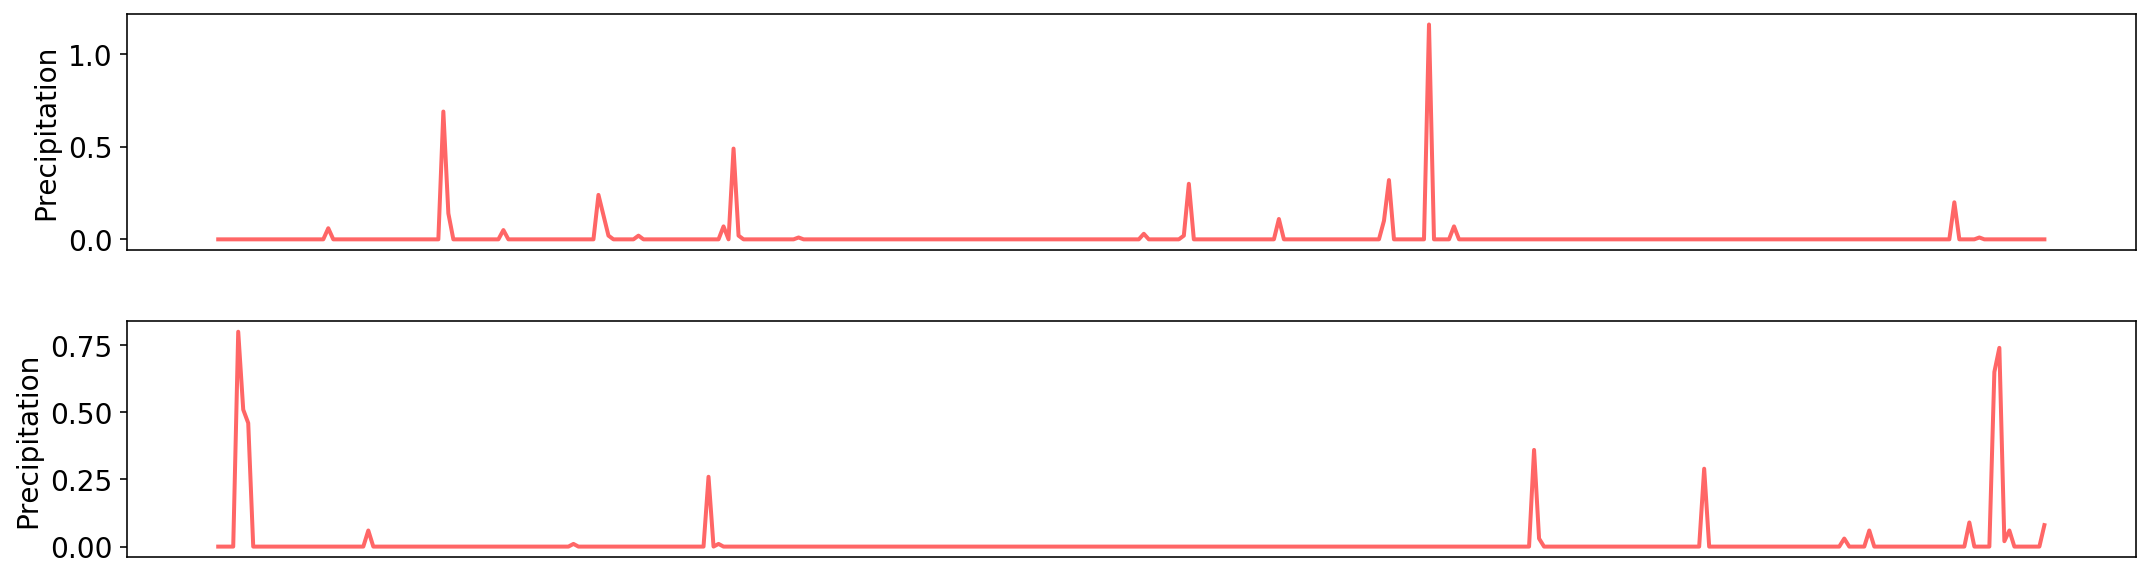

In [12]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(18,5))

ax1.plot(desert_precip_2012['Total Precipitation'],color='red',linewidth=2,alpha=0.6)
#ax1.plot(base['Psi'],color='blue',linewidth=2)

ax1.set_ylabel('Precipitation',size=14)
#ax1.set_xlim(-10,365*year+10)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


ax2.plot(desert_precip_2016['Total Precipitation'],color='red',linewidth=2,alpha=0.6)    
#ax2.plot(base['Temp'],color='blue',linewidth=2)

ax2.set_ylabel('Precipitation',size=14)
#ax2.set_xlim(-10,365*year+10)
ax2.tick_params(bottom=False,labelbottom=False, labelsize=14)    

#for i in range(year-1):
#    ax2.axvline(x=365*(i+1)-1, color='k',linestyle=':',lw=2)
    
plt.subplots_adjust(hspace=0.3)

plt.show()

In [27]:
desert_precip_comb = \
pd.concat([desert_precip_cor[desert_precip['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2018]['Total Precipitation'].reset_index(drop=True),
           desert_precip_cor[desert_precip['Year']==2019]['Total Precipitation'].reset_index(drop=True)
          ],axis=1,ignore_index=True,sort=False)
desert_precip_comb

,0,1,2,3,4,5,6
0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
1,0.00,0.0,0.00,0.0,0.0,0.00,0.00
2,0.01,0.0,0.00,0.0,0.0,0.00,0.00
3,0.00,0.0,0.00,0.0,0.0,0.00,0.00
4,0.00,0.0,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
360,0.00,0.0,0.00,0.0,0.0,0.00,0.00
361,0.00,0.0,0.00,0.0,0.0,0.00,0.00
362,0.00,0.0,0.00,0.0,0.0,0.00,0.00
363,0.00,0.0,0.16,0.0,0.0,0.00,0.04


In [28]:
desert_precip_daily_mean = desert_precip_comb.mean(axis=1)
desert_precip_daily_mean

0      0.000000
1      0.000000
2      0.001429
3      0.000000
4      0.000000
         ...   
360    0.000000
361    0.000000
362    0.000000
363    0.028571
364    0.017143
Length: 365, dtype: float64

In [29]:
sum(desert_precip_daily_mean)

4.339999999999998

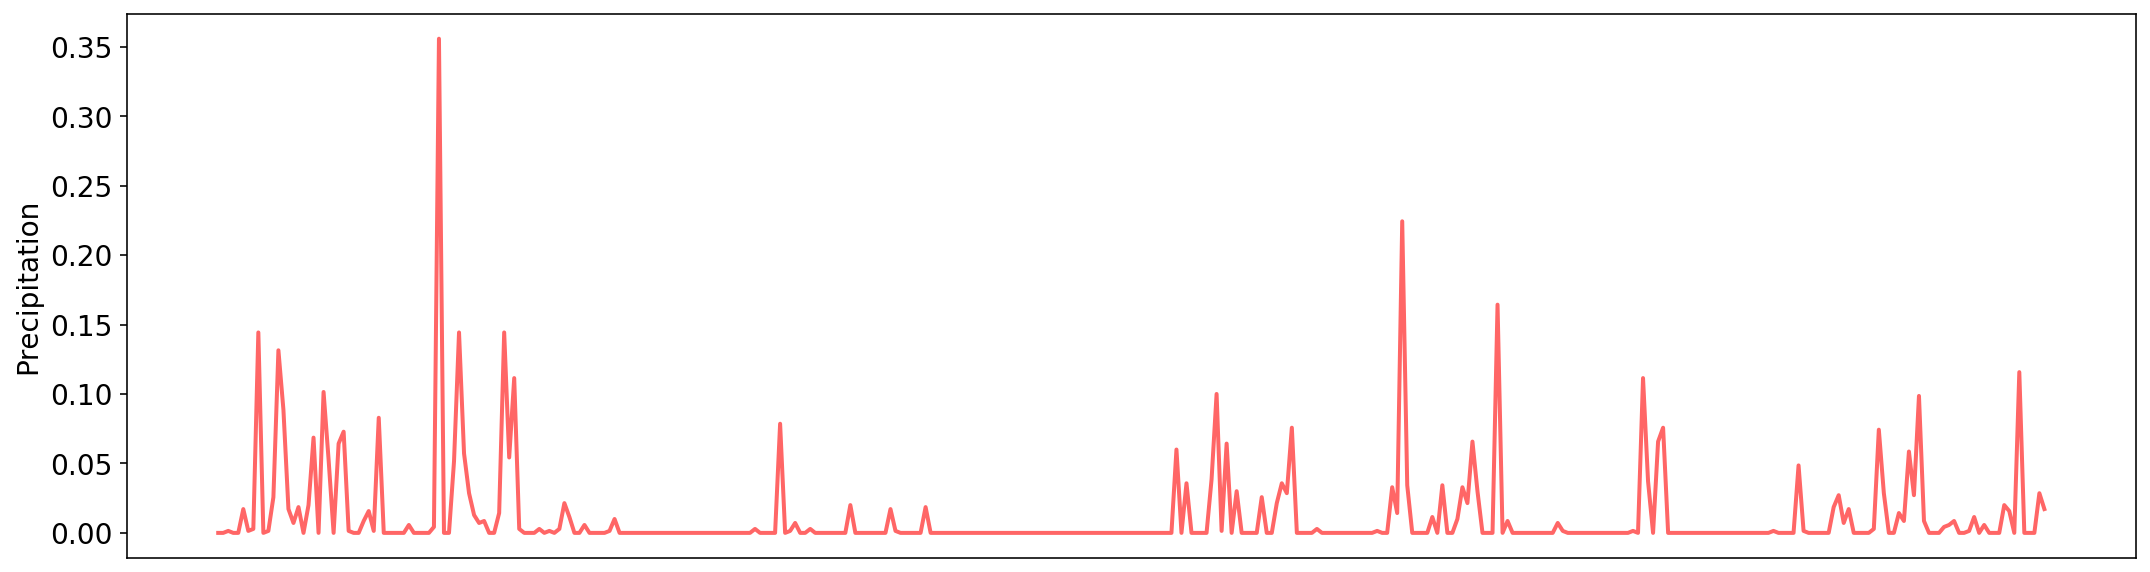

In [30]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(desert_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

In [31]:
index_dry = desert_precip_daily_mean==0
index_rain= desert_precip_daily_mean!=0
desert_precip_daily = desert_precip_daily_mean.copy()

In [38]:
desert_precip_daily_mean.max()

0.35571428571428576

In [41]:
desert_precip_daily[index_dry]  = -10.
desert_precip_daily[index_rain] = -0.1 * (desert_precip_daily_mean.max()/desert_precip_daily_mean[index_rain])

In [45]:
desert_precip_daily.index

RangeIndex(start=0, stop=365, step=1)

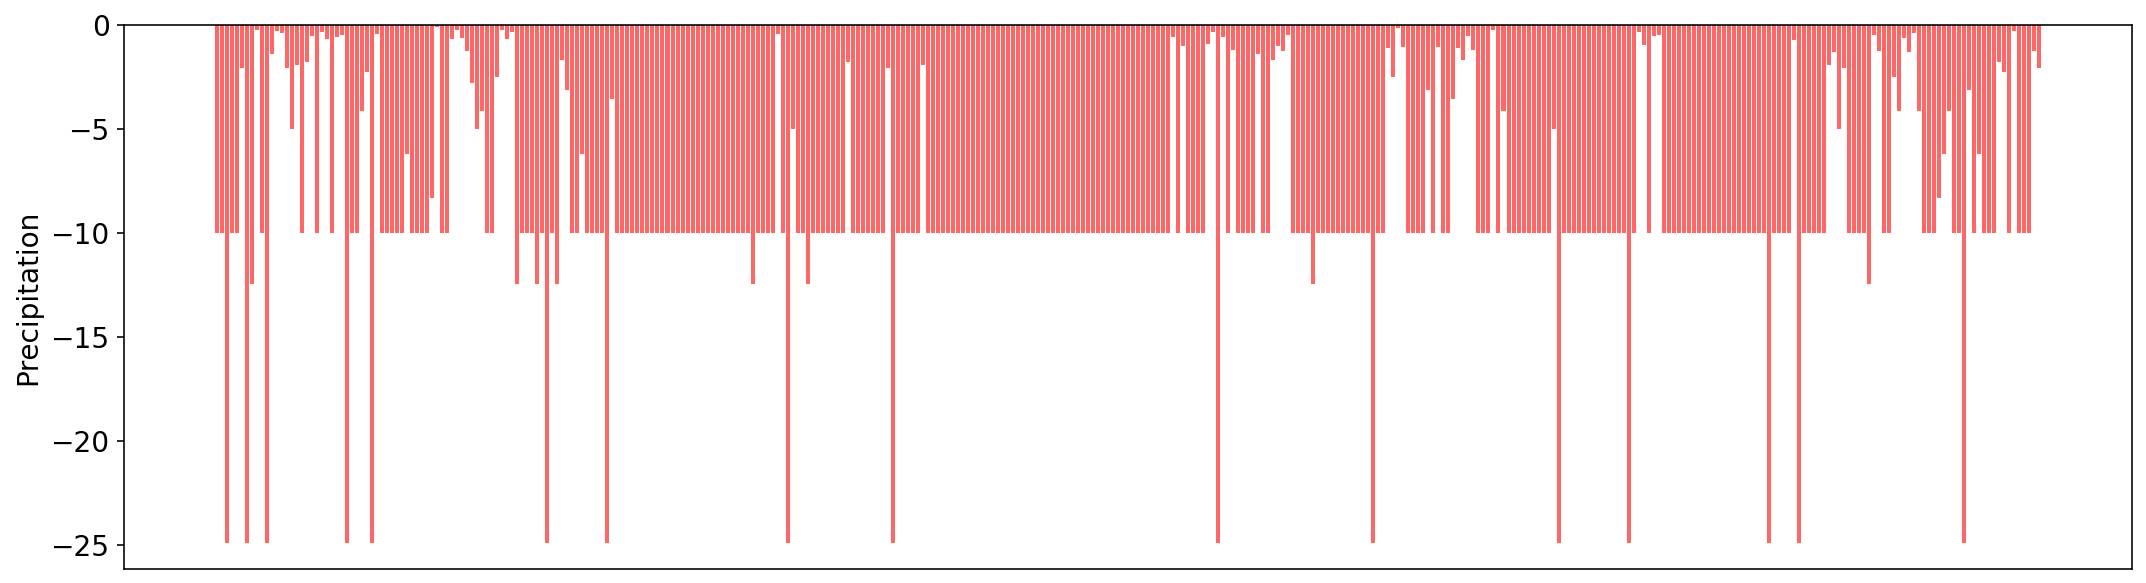

In [46]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))
ax1.bar(desert_precip_daily.index,desert_precip_daily,color='red',linewidth=2,alpha=0.6)
ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    
plt.show()

## `Scrubland`

In [34]:
scrubland_precip = pd.read_csv("precipitation/Burns_Pinyon_Ridge_Reserve_Daily_Precipitation.csv")
scrubland_precip.head()

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/11,2011,1,1,0.00
1,1/2/11,2011,2,2,0.00
2,1/3/11,2011,3,3,0.03
3,1/4/11,2011,4,4,0.00
4,1/5/11,2011,5,5,0.00


In [35]:
scrubland_precip.tail()

,Date,Year,Day of Year,Day of Run,Total Precipitation
3282,12/27/19,2019,361,3283,0.70
3283,12/28/19,2019,362,3284,0.00
3284,12/29/19,2019,363,3285,0.00
3285,12/30/19,2019,364,3286,0.07
3286,12/31/19,2019,365,3287,0.01


In [36]:
scrubland_precip.isnull().values.any()

False

In [37]:
scrubland_precip[scrubland_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation


In [38]:
scrubland_precip_comb = \
pd.concat([scrubland_precip[scrubland_precip['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2018]['Total Precipitation'].reset_index(drop=True),
           scrubland_precip[scrubland_precip['Year']==2019]['Total Precipitation'].reset_index(drop=True)
          ],axis=1,ignore_index=True,sort=False)
scrubland_precip_comb

,0,1,2,3,4,5,6
0,0.00,0.0,0.00,0.0,0.0,0.0,0.00
1,0.00,0.0,0.00,0.0,0.0,0.0,0.00
2,0.03,0.0,0.00,0.0,0.0,0.0,0.00
3,0.00,0.0,0.00,0.0,0.0,0.0,0.00
4,0.00,0.0,0.00,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...
360,0.00,0.0,0.00,0.0,0.0,0.0,0.70
361,0.00,0.0,0.00,0.0,0.0,0.0,0.00
362,0.00,0.0,0.00,0.0,0.0,0.0,0.00
363,0.00,0.0,0.00,0.0,0.0,0.0,0.07


In [39]:
scrubland_precip_daily_mean = scrubland_precip_comb.mean(axis=1)
scrubland_precip_daily_mean

0      0.000000
1      0.000000
2      0.004286
3      0.000000
4      0.000000
         ...   
360    0.100000
361    0.000000
362    0.000000
363    0.010000
364    0.005714
Length: 365, dtype: float64

In [40]:
sum(scrubland_precip_daily_mean)

6.788571428571427

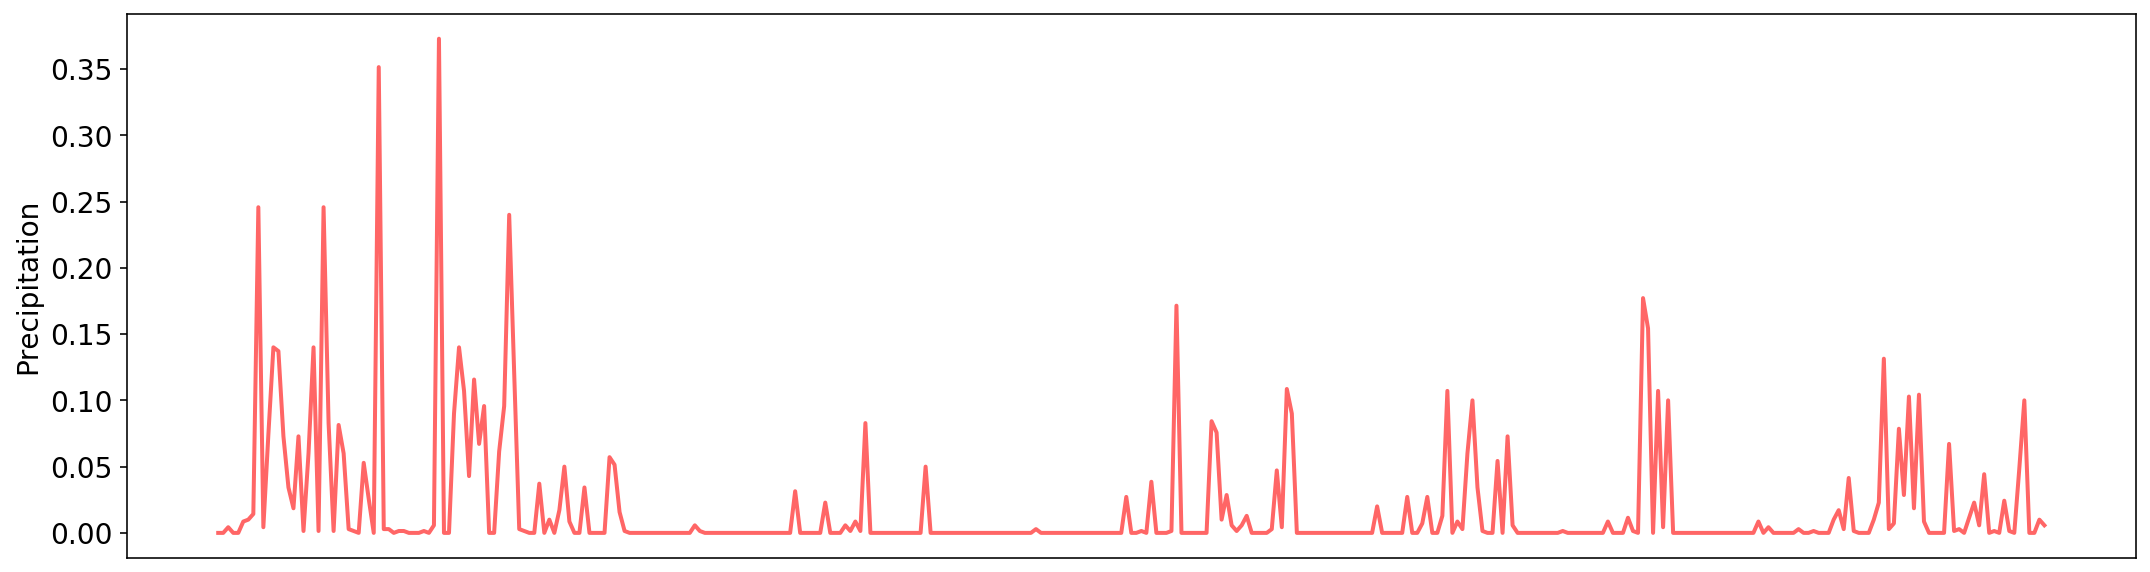

In [41]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(scrubland_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

## grassland

Read .mat file in Python

import scipy.io
mat = scipy.io.loadmat('file.mat')

## `Pine-oak`

2010 --> 2018

In [42]:
pineoak_precip = pd.read_csv("precipitation/James_Reserve_Daily_Precipitation.csv")
pineoak_precip

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/10,2010,1,1,0.0
1,1/2/10,2010,2,2,0.0
2,1/3/10,2010,3,3,0.0
3,1/4/10,2010,4,4,0.0
4,1/5/10,2010,5,5,0.0
...,...,...,...,...,...
3282,12/27/18,2018,361,3283,0.0
3283,12/28/18,2018,362,3284,-9999.0
3284,12/29/18,2018,363,3285,-9999.0
3285,12/30/18,2018,364,3286,-9999.0


In [43]:
pineoak_precip.isnull().values.any()

False

In [44]:
pineoak_precip[pineoak_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation
1136,2/10/13,2013,41,1137,-9999.0
1137,2/11/13,2013,42,1138,-9999.0
1138,2/12/13,2013,43,1139,-9999.0
1139,2/13/13,2013,44,1140,-9999.0
1140,2/14/13,2013,45,1141,-9999.0
1834,1/9/15,2015,9,1835,-9999.0
1835,1/10/15,2015,10,1836,-9999.0
1836,1/11/15,2015,11,1837,-9999.0
2945,1/24/18,2018,24,2946,-9999.0
3129,7/27/18,2018,208,3130,-9999.0


In [45]:
pineoak_precip_cor = pineoak_precip.copy()
pineoak_precip_cor[pineoak_precip['Total Precipitation'] < 0.0] = 0.0
pineoak_precip_cor

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/10,2010.0,1.0,1.0,0.0
1,1/2/10,2010.0,2.0,2.0,0.0
2,1/3/10,2010.0,3.0,3.0,0.0
3,1/4/10,2010.0,4.0,4.0,0.0
4,1/5/10,2010.0,5.0,5.0,0.0
...,...,...,...,...,...
3282,12/27/18,2018.0,361.0,3283.0,0.0
3283,0,0.0,0.0,0.0,0.0
3284,0,0.0,0.0,0.0,0.0
3285,0,0.0,0.0,0.0,0.0


In [46]:
pineoak_precip_comb = \
pd.concat([pineoak_precip_cor[pineoak_precip_cor['Year']==2010]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           pineoak_precip_cor[pineoak_precip_cor['Year']==2018]['Total Precipitation'].reset_index(drop=True)
          ],axis=1,ignore_index=True,sort=False)
pineoak_precip_comb

,0,1,2,3,4,5,6
0,0.00,0.00,0.0,0.00,0.01,0.02,0.0
1,0.00,0.30,0.0,0.00,0.00,0.00,0.0
2,0.00,0.48,0.0,0.00,0.00,0.00,0.0
3,0.00,0.00,0.0,0.00,0.00,0.00,0.0
4,0.00,0.00,0.0,0.00,0.00,0.43,0.0
...,...,...,...,...,...,...,...
360,0.00,0.00,NaN,0.00,0.00,0.00,NaN
361,0.00,0.00,NaN,0.00,0.00,0.00,NaN
362,1.68,0.00,NaN,0.00,NaN,0.00,NaN
363,0.00,0.00,NaN,0.49,NaN,0.00,NaN


In [47]:
pineoak_precip_daily_mean = pineoak_precip_comb.mean(axis=1)
pineoak_precip_daily_mean

0      0.004286
1      0.042857
2      0.068571
3      0.000000
4      0.061429
         ...   
360    0.000000
361    0.000000
362    0.420000
363    0.122500
364    0.007500
Length: 365, dtype: float64

In [48]:
sum(pineoak_precip_daily_mean)

42.3409523809524

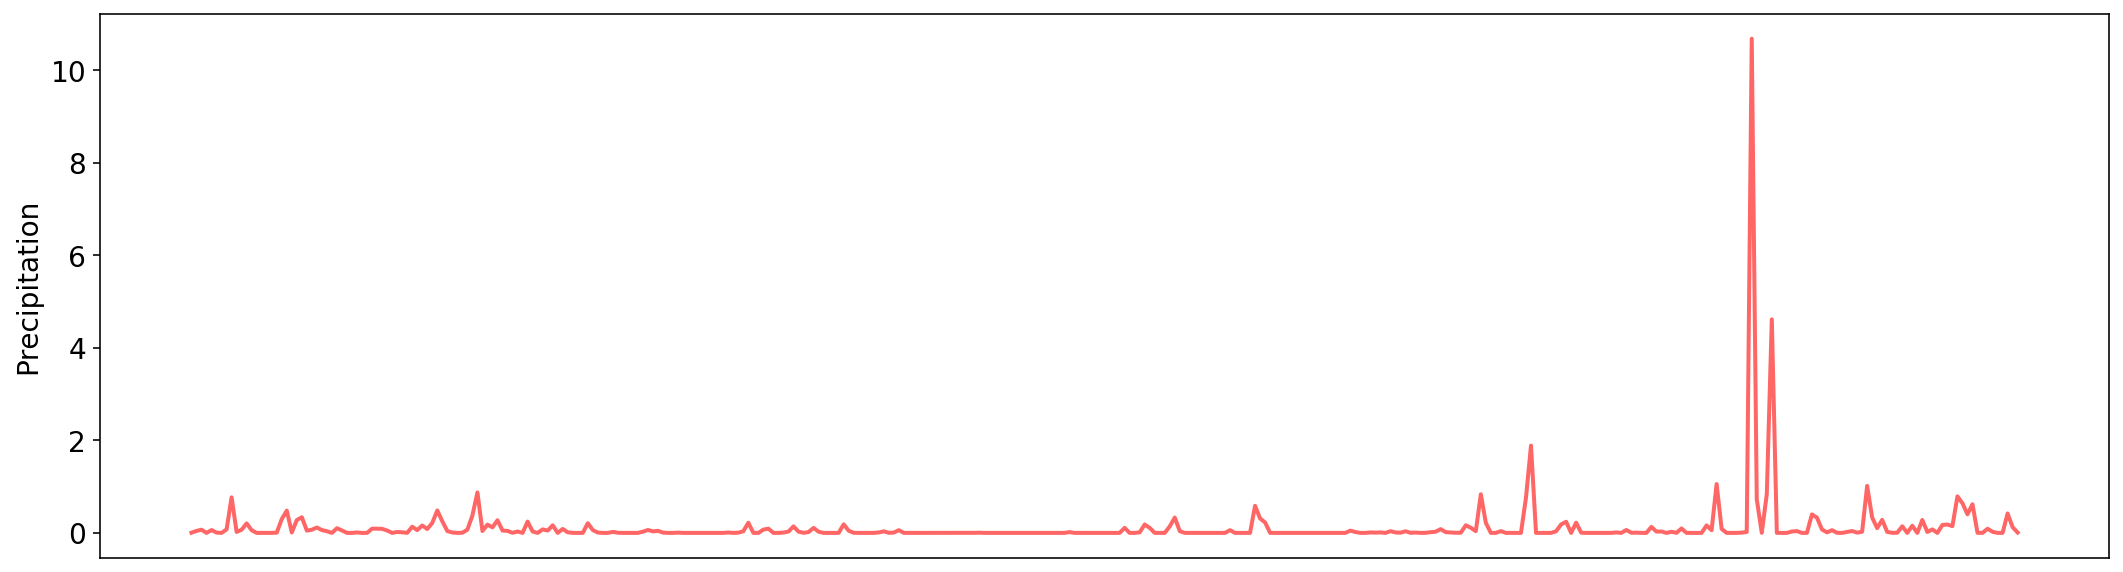

In [49]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(pineoak_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

## `Subalpine`

2009 --> 2019

In [50]:
subalpine_precip = pd.read_csv("precipitation/MtSanJacinoto_Daily_Precipitation.csv")
subalpine_precip

,Date,Year,Day of Year,Day of Run,Total Precipitation
0,1/1/09,2009,1,1,0.00
1,1/2/09,2009,2,2,0.00
2,1/3/09,2009,3,3,0.00
3,1/4/09,2009,4,4,0.12
4,1/5/09,2009,5,5,0.00
...,...,...,...,...,...
4012,12/27/19,2019,361,4013,0.29
4013,12/28/19,2019,362,4014,0.04
4014,12/29/19,2019,363,4015,0.00
4015,12/30/19,2019,364,4016,0.00


In [51]:
subalpine_precip.isnull().values.any()

False

In [52]:
subalpine_precip[subalpine_precip['Total Precipitation'] < 0.0]

,Date,Year,Day of Year,Day of Run,Total Precipitation


In [53]:
subalpine_precip_comb = \
pd.concat([subalpine_precip[subalpine_precip['Year']==2009]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2010]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2011]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2013]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2014]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2015]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2017]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2018]['Total Precipitation'].reset_index(drop=True),
           subalpine_precip[subalpine_precip['Year']==2019]['Total Precipitation'].reset_index(drop=True),
          ],axis=1,ignore_index=True,sort=False)
subalpine_precip_comb

,0,1,2,3,4,5,6,7,8
0,0.00,0.00,0.00,0.0,0.00,0.28,0.28,0.0,0.02
1,0.00,0.00,0.00,0.0,0.00,0.14,0.00,0.0,0.10
2,0.00,0.00,0.32,0.0,0.00,0.00,0.00,0.0,0.01
3,0.12,0.00,0.15,0.0,0.00,0.00,0.00,0.0,0.00
4,0.00,0.00,0.00,0.0,0.00,0.00,0.11,0.0,0.00
...,...,...,...,...,...,...,...,...,...
360,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.29
361,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.04
362,0.00,0.02,0.00,0.0,0.00,0.08,0.00,0.0,0.00
363,0.00,0.04,0.00,0.0,0.00,0.00,0.00,0.0,0.00


In [54]:
subalpine_precip_daily_mean = subalpine_precip_comb.mean(axis=1)
subalpine_precip_daily_mean

0      0.064444
1      0.026667
2      0.036667
3      0.030000
4      0.012222
         ...   
360    0.032222
361    0.004444
362    0.011111
363    0.004444
364    0.051111
Length: 365, dtype: float64

In [55]:
sum(subalpine_precip_daily_mean)

12.626666666666674

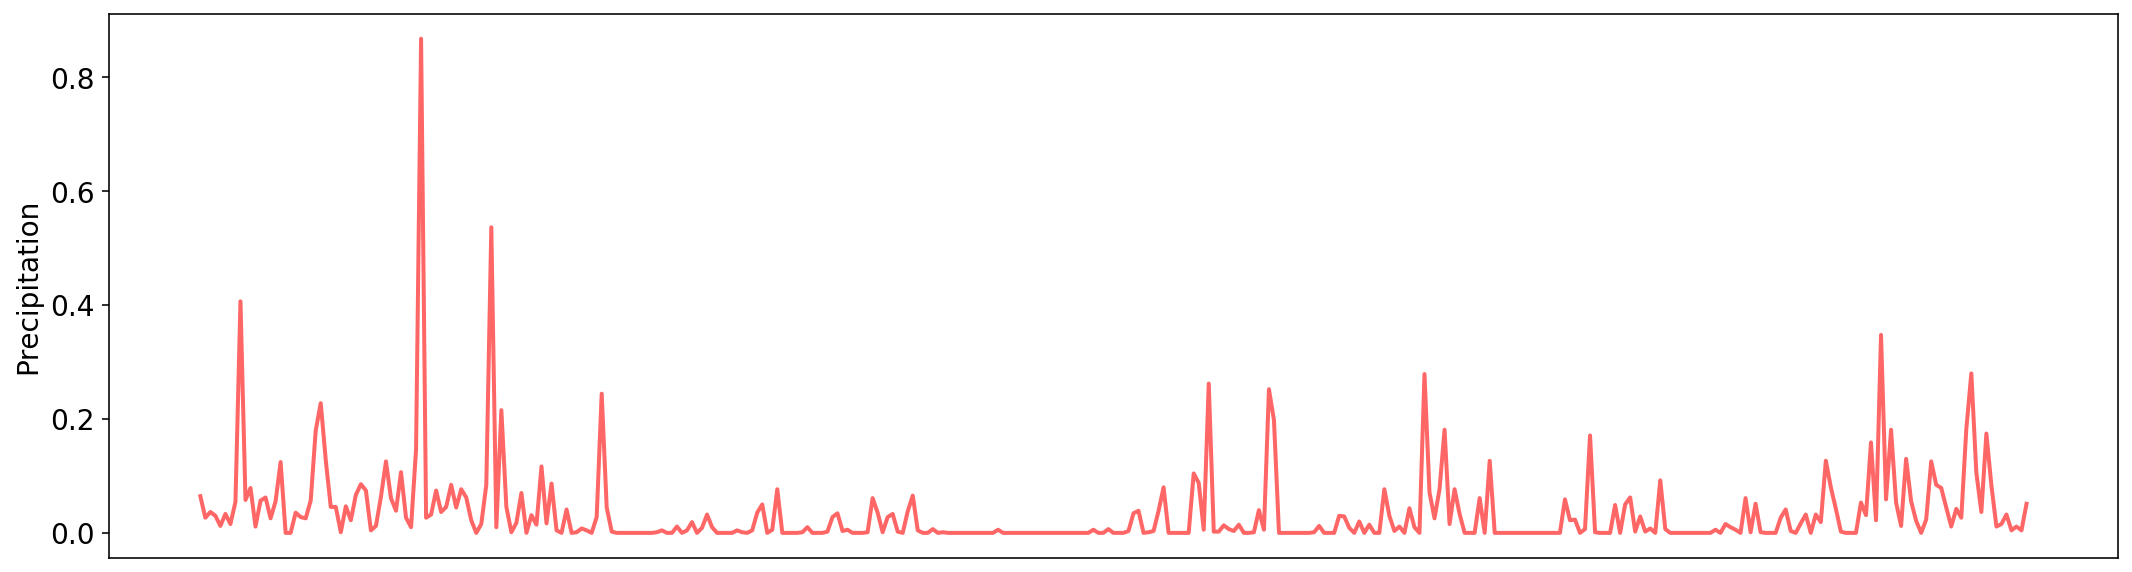

In [56]:
fig, ax1 = plt.subplots(1, 1,figsize=(18,5))

ax1.plot(subalpine_precip_daily_mean,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Precipitation',size=14)
ax1.tick_params(bottom=False,labelbottom=False,labelsize=14)    


plt.show()

## Water potential ($\psi$) of the Grassland site at Loma Ridge, CA

derived from measured fuel moisture (Allison and Goulden 2017 SBB)

In [71]:
#grassland = pd.read_csv('precipitation/grassland_water_potential.csv', index_col=0)
grassland = pd.read_csv('precipitation/climate_v0.csv')

grassland.head()

,Temp,FM,Psi,Date
0,10.823177,51.092615,-0.699744,12/15/10
1,11.276333,59.277813,-0.590705,12/16/10
2,9.696135,65.896792,-0.523555,12/17/10
3,12.626583,69.708313,-0.491047,12/18/10
4,12.442771,70.763521,-0.482708,12/19/10


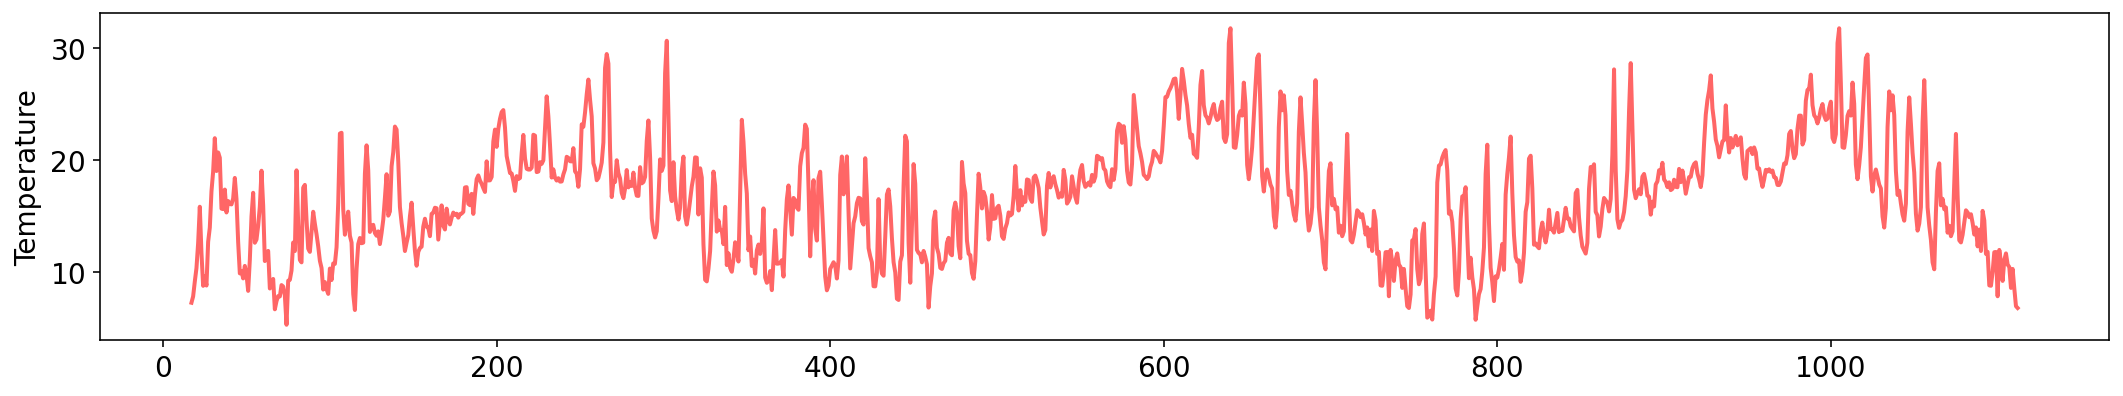

In [73]:
grassland_temp = grassland['Temp'][17:]
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))

ax1.plot(grassland_temp,color='red',linewidth=2,alpha=0.6)

ax1.set_ylabel('Temperature',size=14)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)


plt.show()

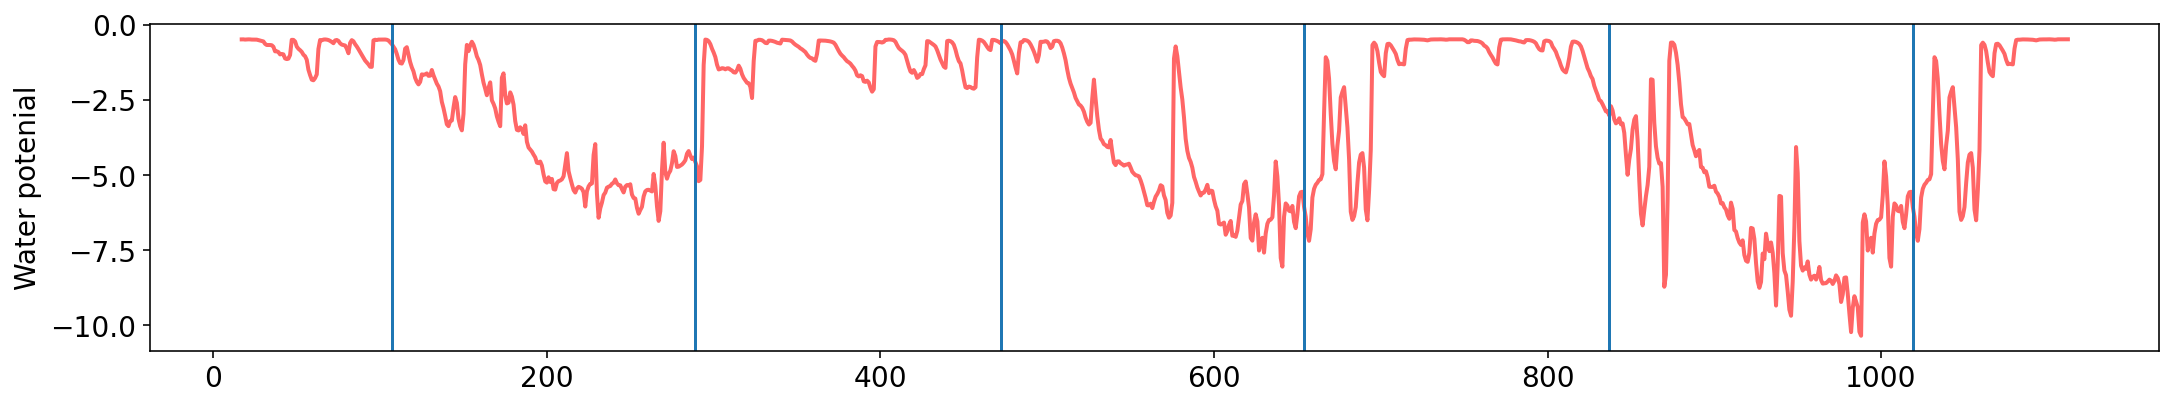

In [11]:
### subset only the data from 1/1/2011 on
grassland_psi = grassland['Psi'][17:]

fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(grassland_psi,color='red',linewidth=2,alpha=0.6)
ax1.set_ylabel('Water potenial',size=14)
#ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.axvline(x=108-1)
ax1.axvline(x=290-1)

ax1.axvline(x=108-1+365)
ax1.axvline(x=290-1+365)

ax1.axvline(x=108-1+365*2)
ax1.axvline(x=290-1+365*2)


plt.show()

## Derive $\psi$ for each of the other four sites

**Method**: by LINEARLY scaling the grassland site $\psi$ with **Total Annual Precipitation ($TAP$)** at each site.

**NOTE**: applied only to the DRY SEASON, assuming the same $\psi$ in the WET season across the gradient.

start of dry season: 108 | end of dry season: 290

In [2]:
## Per Glassman et al. 2019 (PNAS)
TAP = pd.Series(data=[213.5, 428.4, 569.4, 1415.8, 1376.5],
                index=['desert', 'scrubland', 'grassland', 'pineoak', 'subalpine'])
#TAP = pd.Series(data=[100, 193, 242, 402, 265],index=['desert', 'scrubland', 'grassland', 'pineoak', 'subalpine'])
TAP

desert        213.5
scrubland     428.4
grassland     569.4
pineoak      1415.8
subalpine    1376.5
dtype: float64

In [3]:
MAT= pd.Series(data=[22.8, 15.6, 16.4, 12.3, 10.3],index=['desert', 'scrubland', 'grassland', 'pineoak', 'subalpine'])
MAT

desert       22.8
scrubland    15.6
grassland    16.4
pineoak      12.3
subalpine    10.3
dtype: float64

In [38]:
MAT/MAT.grassland

desert       1.390244
scrubland    0.951220
grassland    1.000000
pineoak      0.750000
subalpine    0.628049
dtype: float64

In [39]:
np.exp(MAT/MAT.grassland)

desert       4.015829
scrubland    2.588865
grassland    2.718282
pineoak      2.117000
subalpine    1.873951
dtype: float64

In [40]:
np.log(MAT/MAT.grassland) + 1

desert       1.329479
scrubland    0.949990
grassland    1.000000
pineoak      0.712318
subalpine    0.534863
dtype: float64

In [41]:
np.log10(TAP.grassland/TAP)

desert       0.426020
scrubland    0.123568
grassland    0.000000
pineoak     -0.395584
subalpine   -0.383359
dtype: float64

In [53]:
scaling_factor = 1.0 + np.log(TAP.grassland/TAP) * (MAT/MAT.grassland)
scaling_factor

desert       2.363755
scrubland    1.270647
grassland    1.000000
pineoak      0.316850
subalpine    0.445611
dtype: float64

In [89]:
scaling_factor_temp = 1+np.log(MAT/MAT.grassland)
scaling_factor_temp

desert       1.329479
scrubland    0.949990
grassland    1.000000
pineoak      0.712318
subalpine    0.534863
dtype: float64

## Desert $\psi$

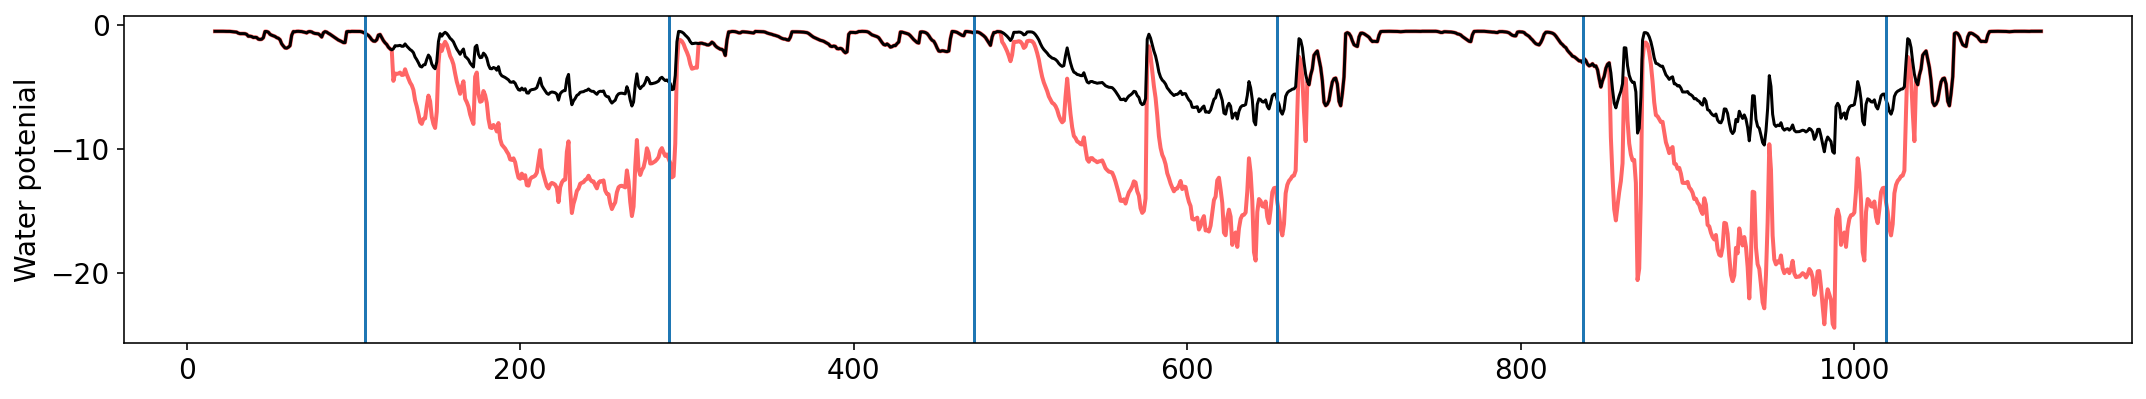

In [64]:
#vectorize scaling factor distinguished between dry and wet season
scaling_factor_vector = [scaling_factor.desert]*(365*3+1)
for index, item in enumerate(scaling_factor_vector):
    if (index < 107) or (index > 289 and index < 365 + 107) or (index > 365 + 289 and index < 365*2 + 107) or (index>365*2+289):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] += np.ndarray.item(np.random.uniform(-0.1,0.1,1))
        
#data derived        
desert_psi = grassland_psi*scaling_factor_vector

#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.set_ylabel('Water potenial',size=14)
#ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.plot(desert_psi,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_psi,color='k')


ax1.axvline(x=108-1)
ax1.axvline(x=290-1)

ax1.axvline(x=108-1+365)
ax1.axvline(x=290-1+365)

ax1.axvline(x=108-1+365*2)
ax1.axvline(x=290-1+365*2)

plt.show()

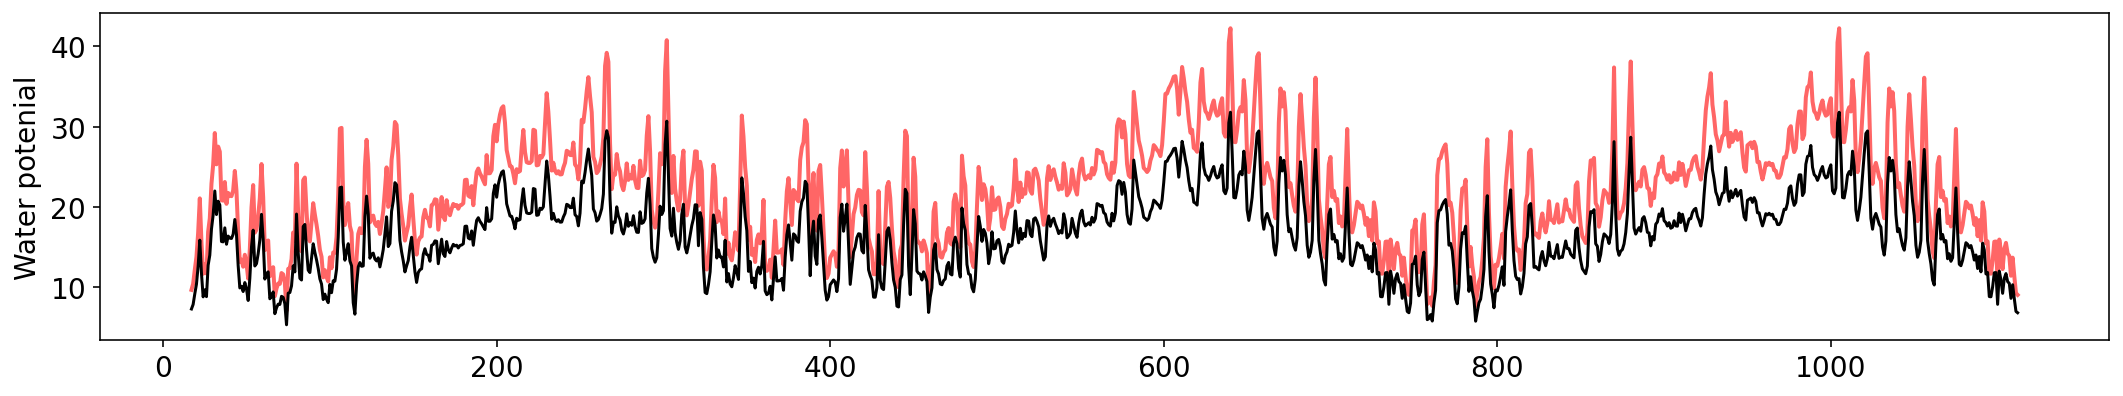

In [79]:
#vectorize scaling factor distinguished between dry and wet season
scaling_factor_temp = [scaling_factor_temp.desert]*(365*3+1)
#data derived        
desert_temp = grassland_temp*scaling_factor_temp

#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.set_ylabel('Water potenial',size=14)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.plot(desert_temp,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_temp,color='k')

plt.show()

## Scrubland $\psi$

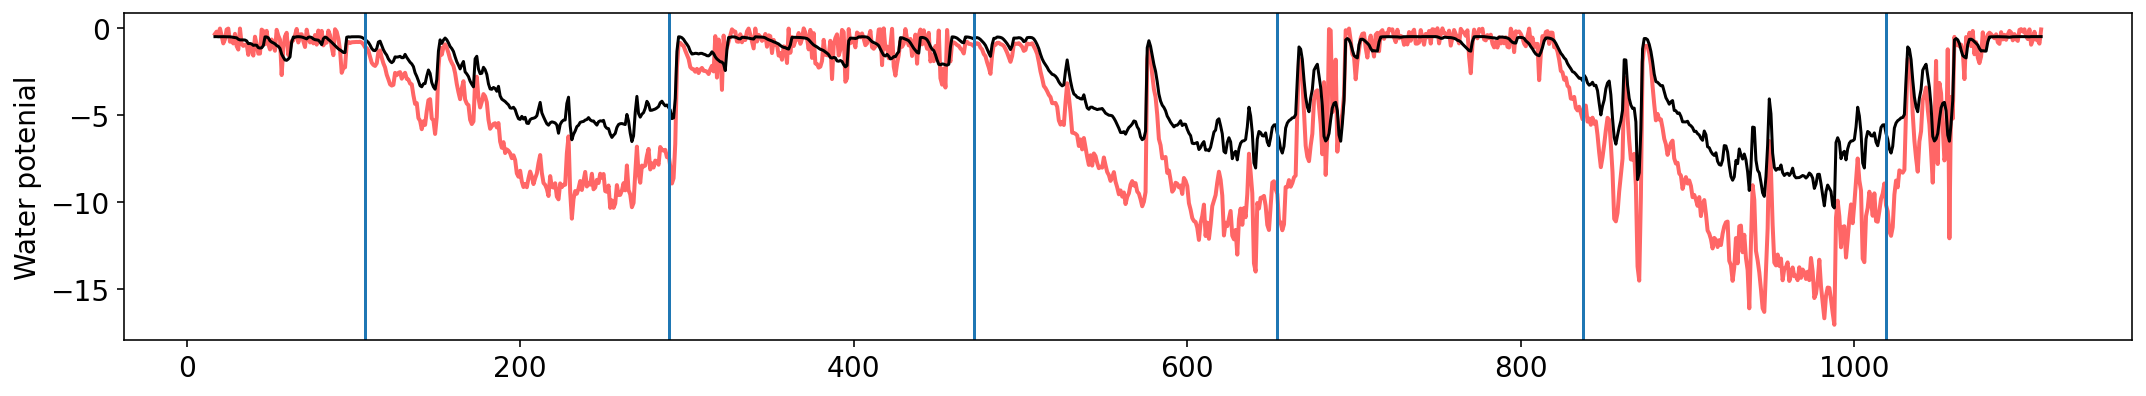

In [65]:
#vectorize scaling factor distinguishing between dry and wet season
scaling_factor_vector = [scaling_factor.scrubland]*(365*3+1)
for index, item in enumerate(scaling_factor_vector):
    #if (index < 107-30) | (index > 289+10 & index < 365 + 107-30) | (index > 365+289+10 & index < 365*2 + 107-30)|(index>365*2+289+10):
    if (index < 107-30) or (index > 289+10 and index < 365 + 107-30) or (index > 365 + 289+10 and index < 365*2 +107-30) or (index>365*2+289+10):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] = scaling_factor_vector[index]*(1+0.3) + np.ndarray.item(np.random.uniform(-0.1,0.1,1))
#data derived        
scrubland_psi = grassland_psi*scaling_factor_vector
#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(scrubland_psi,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_psi,color='k')

ax1.set_ylabel('Water potenial',size=14)
#ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.axvline(x=108-1)
ax1.axvline(x=290-1)

ax1.axvline(x=108-1+365)
ax1.axvline(x=290-1+365)

ax1.axvline(x=108-1+365*2)
ax1.axvline(x=290-1+365*2)

plt.show()

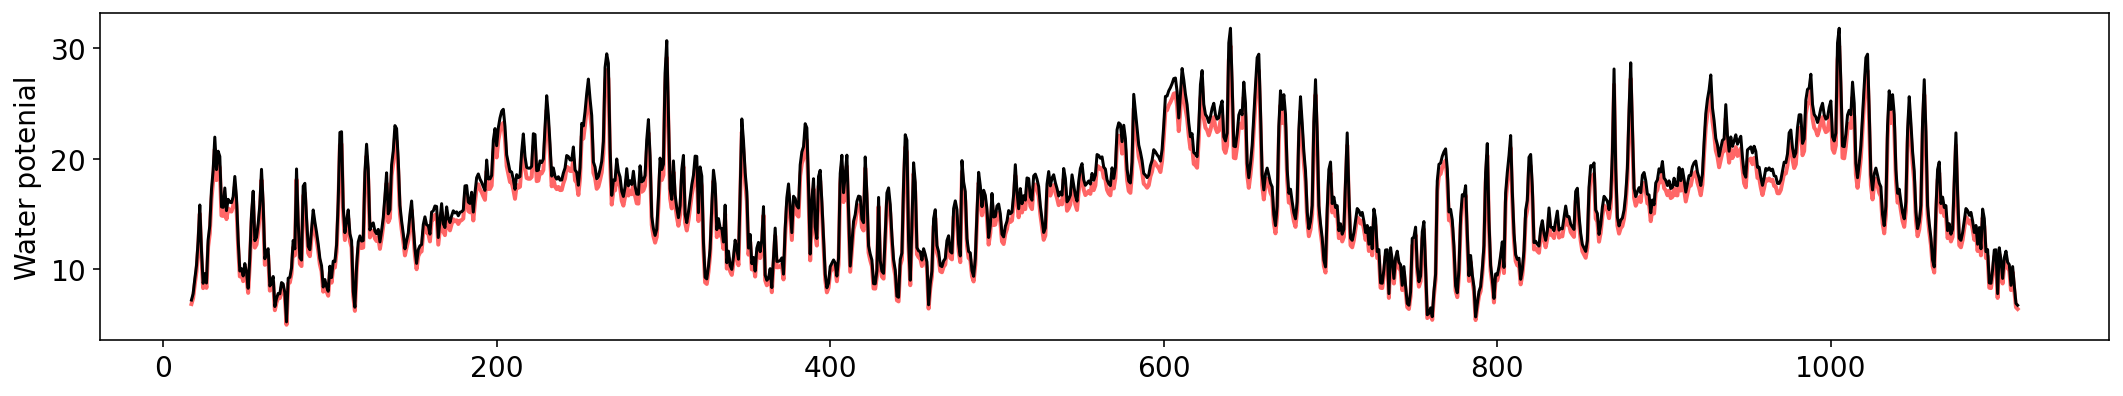

In [85]:
#vectorize scaling factor distinguished between dry and wet season
scaling_factor_temp = [scaling_factor_temp.scrubland]*(365*3+1)
#data derived        
scrubland_temp = grassland_temp*scaling_factor_temp

#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.set_ylabel('Water potenial',size=14)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.plot(scrubland_temp,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_temp,color='k')

plt.show()

## Pine-oak $\psi$

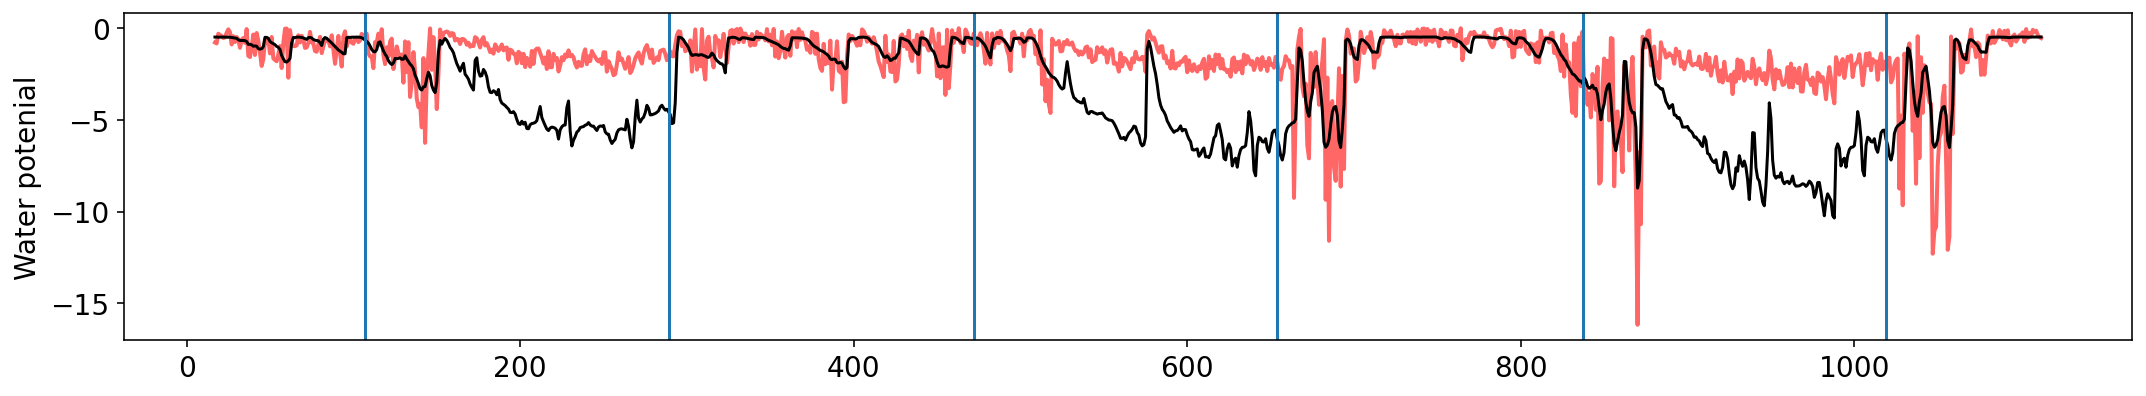

In [66]:
#vectorize scaling factor distinguishing between dry and wet season
scaling_factor_vector = [scaling_factor.pineoak]*(365*3+1)
for index, item in enumerate(scaling_factor_vector):
    if (index < 107+30) or (index > 289-10 and index < 365 + 107+30) or (index > 365 + 289-10 and index < 365*2 + 107+30) or (index>365*2+289-10):
    #if (index < 107+30) | (index > 289-10 & index < 365+107+30) | (index>365+289-10 & index<365*2+107+30) | (index>365*2+289-10):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] += np.ndarray.item(np.random.uniform(-0.1,0.1,1))
#data derived        
pineoak_psi = grassland_psi*scaling_factor_vector
#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(pineoak_psi,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_psi,color='k')

ax1.set_ylabel('Water potenial',size=14)
#ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.axvline(x=108-1)
ax1.axvline(x=290-1)

ax1.axvline(x=108-1+365)
ax1.axvline(x=290-1+365)

ax1.axvline(x=108-1+365*2)
ax1.axvline(x=290-1+365*2)

plt.show()

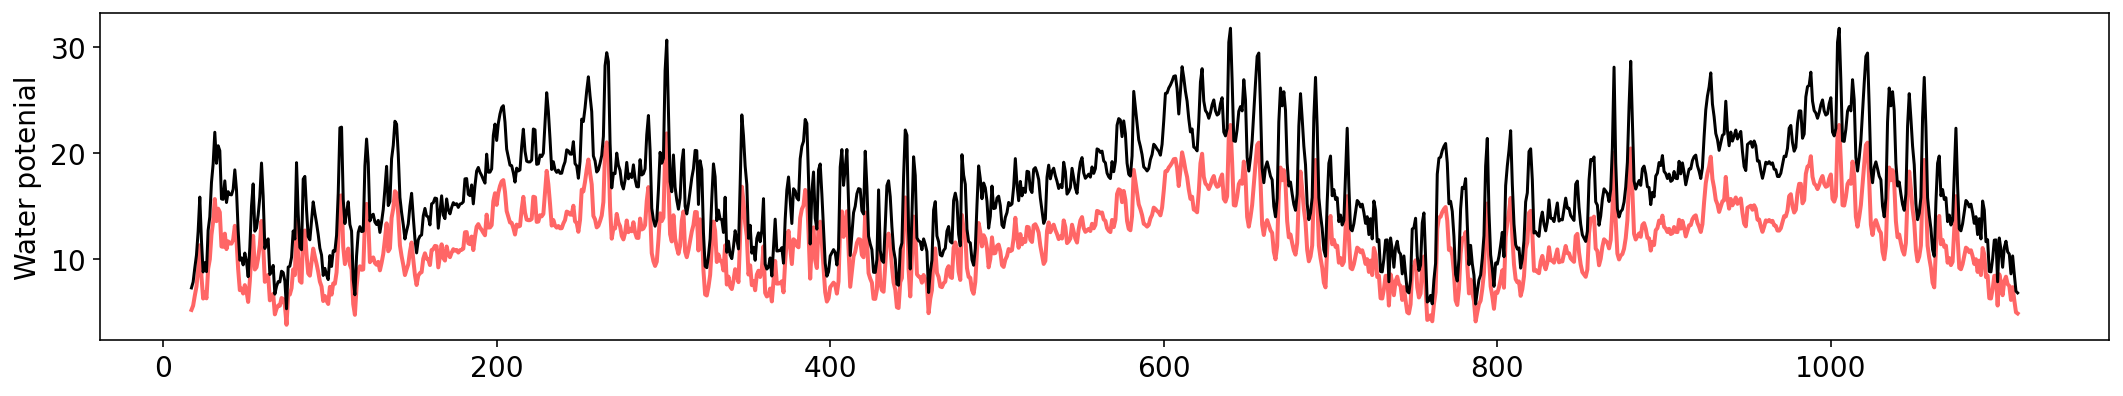

In [90]:
#vectorize scaling factor distinguished between dry and wet season
#data derived        
pineoak_temp = grassland_temp*([scaling_factor_temp.pineoak]*(365*3+1))

#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.set_ylabel('Water potenial',size=14)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.plot(pineoak_temp,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_temp,color='k')

plt.show()

## Subalpine $\psi$

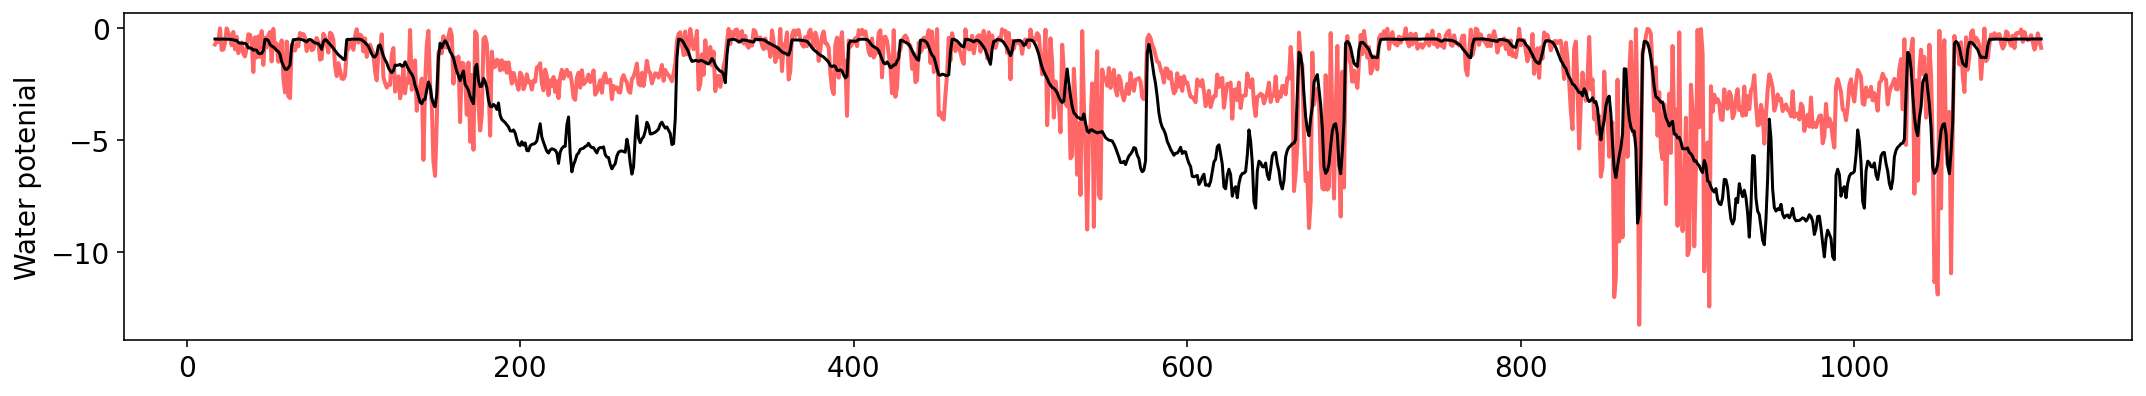

In [67]:
#vectorize scaling factor distinguishing between dry and wet season
scaling_factor_vector = [scaling_factor.subalpine]*(365*3+1)
for index, item in enumerate(scaling_factor_vector):
    if (index < 107+60) or (index > 289-10 and index < 365 + 107+60) or (index > 365 + 289-10 and index < 365*2 + 107+60) or (index>365*2+289-10):
    #if (index < 107+60) | (index > 289-10 & index < 365+107+60)|(index>365+289-10 & index<365*2+107+60)|(index>365*2+289-10):
        scaling_factor_vector[index] = 1.0
        if index%1 == 0:
            scaling_factor_vector[index] = 1.0 + np.ndarray.item(np.random.uniform(-0.999,1.0,1))
    else:
        scaling_factor_vector[index] += np.ndarray.item(np.random.uniform(-0.1,0.1,1))
#data derived        
subalpine_psi = grassland_psi*scaling_factor_vector
#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.plot(subalpine_psi,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_psi,color='k')

ax1.set_ylabel('Water potenial',size=14)
#ax1.set_xlim(-10,365*1+10)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)
plt.show()

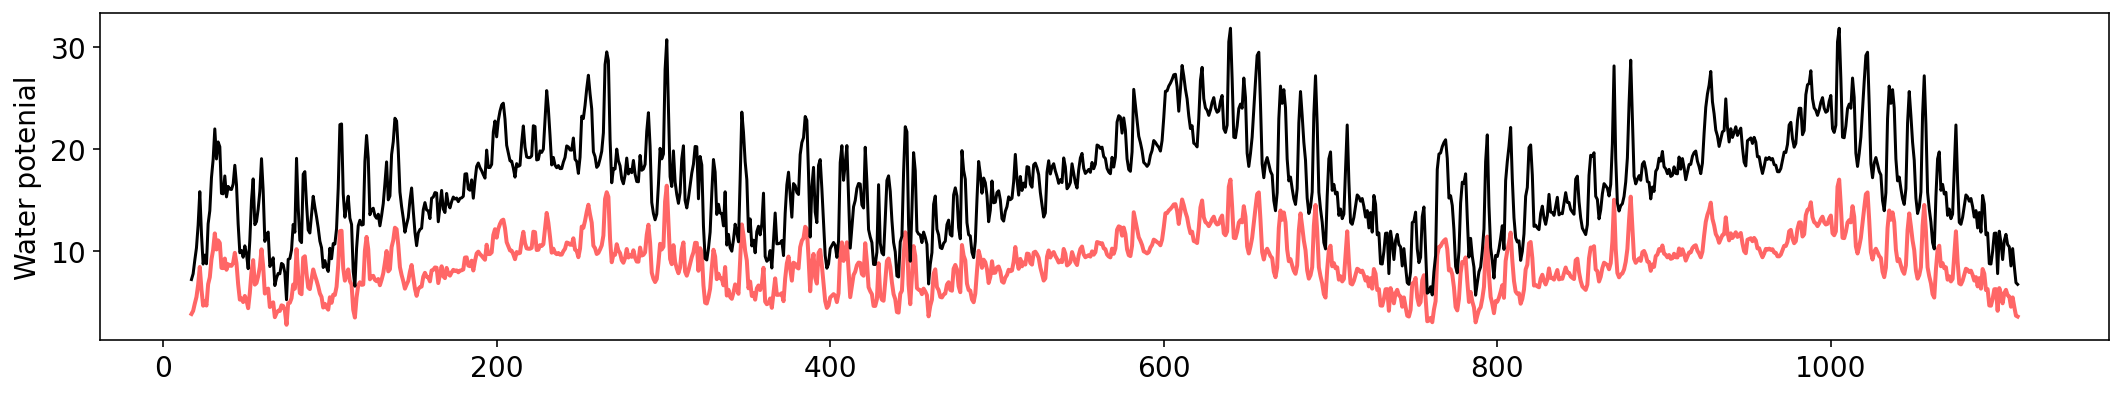

In [92]:
#vectorize scaling factor distinguished between dry and wet season
#data derived        
subalpine_temp = grassland_temp*([scaling_factor_temp.subalpine]*(365*3+1))

#visualization
fig, ax1 = plt.subplots(1, 1,figsize=(18,3))
ax1.set_ylabel('Water potenial',size=14)
ax1.tick_params(bottom=True,labelbottom=True,labelsize=14)

ax1.plot(subalpine_temp,color='red',linewidth=2,alpha=0.6)
ax1.plot(grassland_temp,color='k')

plt.show()

## Concatenate the 5 sites

In [68]:
gradient_psi = pd.concat([desert_psi,scrubland_psi,grassland_psi,pineoak_psi,subalpine_psi],
                         axis=1,ignore_index=False,sort=False)
gradient_psi.columns=['desert', 'scrubland', 'grassland', 'pineoak', 'subalpine']
gradient_psi

,desert,scrubland,grassland,pineoak,subalpine
17,-0.485420,-0.330578,-0.485420,-0.780848,-0.728596
18,-0.484272,-0.194577,-0.484272,-0.833527,-0.581061
19,-0.491783,-0.343975,-0.491783,-0.302382,-0.623920
20,-0.488506,-0.016609,-0.488506,-0.367108,-0.006250
21,-0.484312,-0.427637,-0.484312,-0.429749,-0.967047
...,...,...,...,...,...
1108,-0.481339,-0.203118,-0.481339,-0.209370,-0.955886
1109,-0.481755,-0.658826,-0.481755,-0.135703,-0.716144
1110,-0.482729,-0.692057,-0.482729,-0.370830,-0.232762
1111,-0.481428,-0.887989,-0.481428,-0.492412,-0.536248


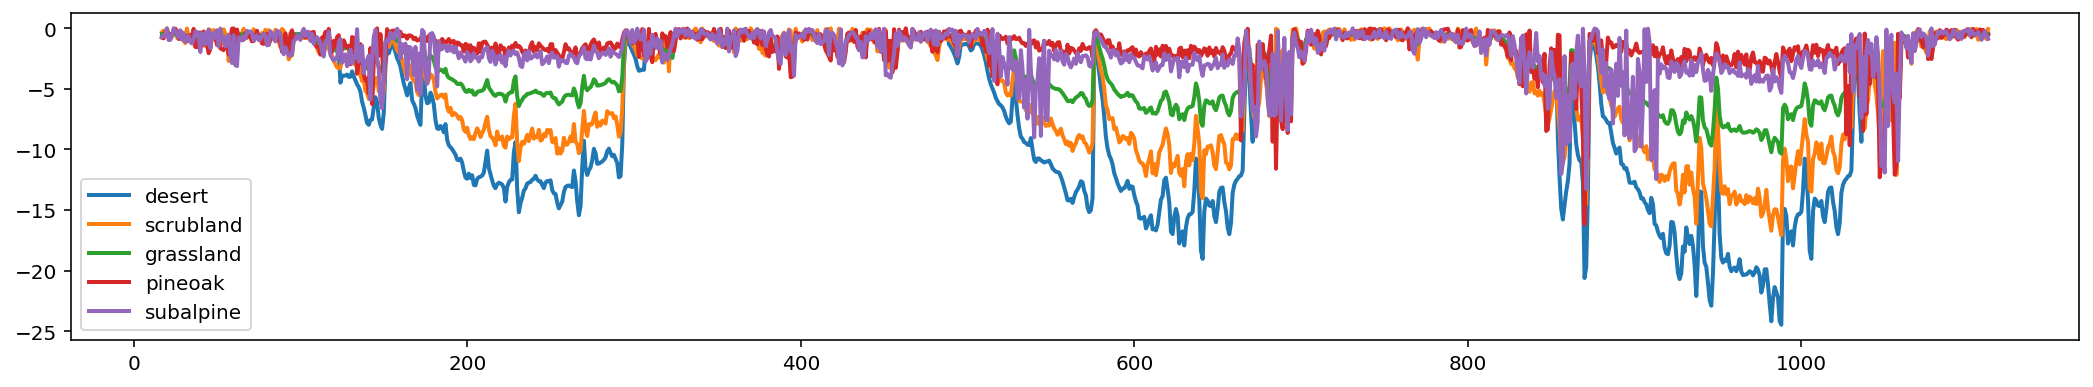

In [69]:
gradient_psi.plot(figsize=(18,3),linewidth=2)
plt.show()

In [93]:
gradient_temp = pd.concat([desert_temp,scrubland_temp,grassland_temp,pineoak_temp,subalpine_temp],
                         axis=1,ignore_index=False,sort=False)
gradient_temp.columns=['desert', 'scrubland', 'grassland', 'pineoak', 'subalpine']
gradient_temp

,desert,scrubland,grassland,pineoak,subalpine
17,9.619530,6.873709,7.235563,5.154021,3.870031
18,10.367722,7.408335,7.798333,5.554893,4.171037
19,12.130736,8.668111,9.124427,6.499493,4.880314
20,13.738533,9.816975,10.333771,7.360930,5.527147
21,16.702746,11.935075,12.563375,8.949117,6.719679
...,...,...,...,...,...
1108,11.383846,8.134414,8.562635,6.099319,4.579833
1109,13.640983,9.747269,10.260396,7.308664,5.487902
1110,11.319768,8.088627,8.514437,6.064986,4.554054
1111,9.208942,6.580321,6.926729,4.934033,3.704848


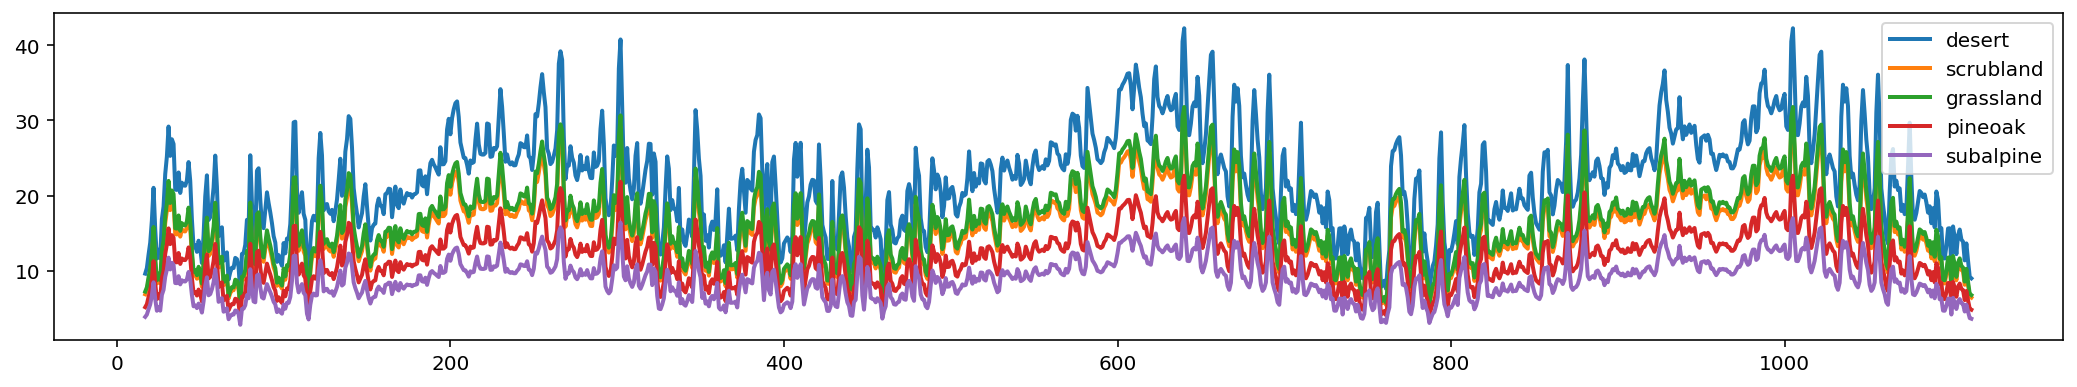

In [94]:
gradient_temp.plot(figsize=(18,3),linewidth=2)
plt.show()

## Write to csv files

In [70]:
gradient_psi.to_csv('precipitation/gradient_psi_v5.csv')

In [95]:
gradient_temp.to_csv('soil_temperature/gradient_temp_v5.csv')